# <font color ="darkorange"> Mid-Bootcamp project </font>

 <font color ="white"> Libraries </font>

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import math
import warnings
import plotly.express as px
warnings.filterwarnings('ignore')
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRFRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score


In [2]:
teams = pd.read_csv("nfl_teams.csv")
teams.head()

,team_name,team_name_short,team_id,team_id_pfr,team_conference,team_division,team_conference_pre2002,team_division_pre2002
0,Arizona Cardinals,Cardinals,ARI,CRD,NFC,NFC West,NFC,NFC West
1,Atlanta Falcons,Falcons,ATL,ATL,NFC,NFC South,NFC,NFC West
2,Baltimore Colts,Colts,IND,CLT,AFC,AFC East,AFC,AFC East
3,Baltimore Ravens,Ravens,BAL,RAV,AFC,AFC North,AFC,AFC Central
4,Boston Patriots,Patriots,NE,NWE,AFC,AFC East,AFC,AFC East


In [3]:
teams.to_csv('teams.txt')

In [4]:
data = pd.read_csv("spreadspoke_scores.csv")
data.head()

,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,spread_favorite,over_under_line,stadium,stadium_neutral,weather_temperature,weather_wind_mph,weather_humidity,weather_detail
0,09/02/1966,1966,1,False,Miami Dolphins,14.0,23.0,Oakland Raiders,NaN,NaN,NaN,Orange Bowl,False,83.0,6.0,71.0,NaN
1,09/03/1966,1966,1,False,Houston Oilers,45.0,7.0,Denver Broncos,NaN,NaN,NaN,Rice Stadium,False,81.0,7.0,70.0,NaN
2,09/04/1966,1966,1,False,San Diego Chargers,27.0,7.0,Buffalo Bills,NaN,NaN,NaN,Balboa Stadium,False,70.0,7.0,82.0,NaN
3,09/09/1966,1966,2,False,Miami Dolphins,14.0,19.0,New York Jets,NaN,NaN,NaN,Orange Bowl,False,82.0,11.0,78.0,NaN
4,09/10/1966,1966,1,False,Green Bay Packers,24.0,3.0,Baltimore Colts,NaN,NaN,NaN,Lambeau Field,False,64.0,8.0,62.0,NaN


In [5]:
stadiums= pd.read_csv("nfl_stadiums.csv", encoding= 'unicode_escape')
stadiums.head()

,stadium,stadium_location,stadium_open,stadium_close,stadium_type,stadium_address,stadium_weather_station_code,stadium_weather_type,stadium_capacity,stadium_surface,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION
0,Acrisure Stadium,"Pittsburgh, PA",2001,NaN,outdoor,"100 Art Rooney Ave, Pittsburgh, PA 15212",15212,cold,"65,500",Grass,USW00094823,"PITTSBURGH ASOS, PA US",40.484600,-80.214400,366.7
1,Alamo Dome,"San Antonio, TX",NaN,NaN,indoor,"100 Montana St, San Antonio, TX 78203",78203,dome,72000,FieldTurf,NaN,NaN,29.416983,-98.478814,NaN
2,Allegiant Stadium,"Paradise, NV",2020,NaN,indoor,NaN,NaN,dome,65000,Grass,NaN,NaN,36.090794,-115.183952,NaN
3,Allianz Arena,"Munich, Germany",NaN,NaN,outdoor,NaN,NaN,moderate,"75,024",Grass,NaN,NaN,48.218967,11.623746,NaN
4,Alltel Stadium,"Jacksonville, FL",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.323889,-81.637500,NaN


In [6]:
# Vamos a arreglar algunos valores erroneos
data.loc[(data.schedule_week == '18'), 'schedule_week'] = '17'
data.loc[(data.schedule_week == 'Wildcard') | (data.schedule_week == 'WildCard'), 'schedule_week'] = '18'
data.loc[(data.schedule_week == 'Division'), 'schedule_week'] = '19'
data.loc[(data.schedule_week == 'Conference'), 'schedule_week'] = '20'
data.loc[(data.schedule_week == 'Superbowl') | (data.schedule_week == 'SuperBowl'), 'schedule_week'] = '21'

In [7]:
# Reemplazamos valores en blanco con NAN
data = data.replace(r'^\s*$', np.nan, regex=True)

In [8]:
# Quitamos columnas con valores nulos ( )
data = data[(data.score_home.isnull() == False) & (data.team_favorite_id.isnull() == False) & (data.over_under_line.isnull() == False) &
        (data.schedule_season >= 1979)]
        
data.head()

,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,spread_favorite,over_under_line,stadium,stadium_neutral,weather_temperature,weather_wind_mph,weather_humidity,weather_detail
2501,09/01/1979,1979,1,False,Tampa Bay Buccaneers,31.0,16.0,Detroit Lions,TB,-3.0,30,Houlihan's Stadium,False,79.0,9.0,87.0,NaN
2502,09/02/1979,1979,1,False,Buffalo Bills,7.0,9.0,Miami Dolphins,MIA,-5.0,39,Ralph Wilson Stadium,False,74.0,15.0,74.0,NaN
2503,09/02/1979,1979,1,False,Chicago Bears,6.0,3.0,Green Bay Packers,CHI,-3.0,31,Soldier Field,False,78.0,11.0,68.0,NaN
2504,09/02/1979,1979,1,False,Denver Broncos,10.0,0.0,Cincinnati Bengals,DEN,-3.0,31.5,Mile High Stadium,False,69.0,6.0,38.0,NaN
2505,09/02/1979,1979,1,False,Kansas City Chiefs,14.0,0.0,Baltimore Colts,KC,-1.0,37,Arrowhead Stadium,False,76.0,8.0,71.0,NaN


In [9]:
# reiniciamos los indices
data.reset_index(drop=True, inplace=True)
data.head()

,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,spread_favorite,over_under_line,stadium,stadium_neutral,weather_temperature,weather_wind_mph,weather_humidity,weather_detail
0,09/01/1979,1979,1,False,Tampa Bay Buccaneers,31.0,16.0,Detroit Lions,TB,-3.0,30,Houlihan's Stadium,False,79.0,9.0,87.0,NaN
1,09/02/1979,1979,1,False,Buffalo Bills,7.0,9.0,Miami Dolphins,MIA,-5.0,39,Ralph Wilson Stadium,False,74.0,15.0,74.0,NaN
2,09/02/1979,1979,1,False,Chicago Bears,6.0,3.0,Green Bay Packers,CHI,-3.0,31,Soldier Field,False,78.0,11.0,68.0,NaN
3,09/02/1979,1979,1,False,Denver Broncos,10.0,0.0,Cincinnati Bengals,DEN,-3.0,31.5,Mile High Stadium,False,69.0,6.0,38.0,NaN
4,09/02/1979,1979,1,False,Kansas City Chiefs,14.0,0.0,Baltimore Colts,KC,-1.0,37,Arrowhead Stadium,False,76.0,8.0,71.0,NaN


In [10]:
# revisamos el tipo de nuestra data
data.dtypes
# Over_under_line deberia ser numerica

schedule_date           object
schedule_season          int64
schedule_week           object
schedule_playoff          bool
team_home               object
score_home             float64
score_away             float64
team_away               object
team_favorite_id        object
spread_favorite        float64
over_under_line         object
stadium                 object
stadium_neutral           bool
weather_temperature    float64
weather_wind_mph       float64
weather_humidity       float64
weather_detail          object
dtype: object

In [11]:
# Cambiamos el tipo de over_under_line y a schedule week
data['over_under_line'] = data.over_under_line.astype(float)
data['schedule_week'] = data.schedule_week.astype(float)


In [12]:
data.dtypes

schedule_date           object
schedule_season          int64
schedule_week          float64
schedule_playoff          bool
team_home               object
score_home             float64
score_away             float64
team_away               object
team_favorite_id        object
spread_favorite        float64
over_under_line        float64
stadium                 object
stadium_neutral           bool
weather_temperature    float64
weather_wind_mph       float64
weather_humidity       float64
weather_detail          object
dtype: object

In [13]:
# Agregamos una columna que nos calcule los puntos totales por partido
data['total_points']= data.score_home + data.score_away



In [14]:
# Voy a eliminar las columnas de stadium_neutral y weather_detail, ya que no me sirven para el analisis 
data=data.drop(['stadium_neutral','weather_detail','schedule_date',], axis=1)


In [15]:
# unimos las bases de datos
data=pd.merge(data,stadiums, on='stadium', how='left')


In [16]:
data=pd.merge(data,teams,left_on='team_home', right_on='team_name')



In [17]:
data=pd.merge(data,teams,left_on='team_away', right_on='team_name')

In [18]:
# Eliminamos columnas que no me sirven
data=data.drop(['schedule_playoff','team_favorite_id','stadium_address','stadium_weather_station_code','stadium_capacity','STATION','NAME','ELEVATION', 'stadium_open','stadium_close', 'weather_humidity', 'stadium_surface', 'stadium_weather_type','stadium_location', 'team_name_x','team_name_short_x','team_id_x','team_id_pfr_x','team_conference_x','team_division_x', 'team_name_y','team_name_short_y','team_id_y','team_id_pfr_y','team_conference_y','team_division_y','stadium_type'],axis=1 )

In [19]:
# Renombramos las columnas
data=data.rename({'team_conference_pre2002_x':'team_home_conference' },axis=1)
data=data.rename({'team_conference_pre2002_y':'team_away_conference' },axis=1)
data=data.rename({'team_division_pre2002_x':'team_home_division' },axis=1)
data=data.rename({'team_division_pre2002_y':'team_away_division' },axis=1)

In [20]:
# Vamos  a crear una columna, que me diga quien es el equipo ganador

def winner(df):
    condiciones = [df['score_home']>df['score_away'], df['score_away']>df['score_home'], df['score_away']==df['score_home']]
    opciones = [df['team_home'],df['team_away'], 'Empate']
    df['winner']=np.select(condiciones,opciones)
    return df

In [21]:
winner(data)

,schedule_season,schedule_week,team_home,score_home,score_away,team_away,spread_favorite,over_under_line,stadium,weather_temperature,weather_wind_mph,total_points,LATITUDE,LONGITUDE,team_home_conference,team_home_division,team_away_conference,team_away_division,winner
0,1979,1.0,Tampa Bay Buccaneers,31.0,16.0,Detroit Lions,-3.0,30.0,Houlihan's Stadium,79.000000,9.000000,47.0,27.961940,-82.54030,NFC,NFC Central,NFC,NFC Central,Tampa Bay Buccaneers
1,1980,12.0,Tampa Bay Buccaneers,10.0,24.0,Detroit Lions,-3.0,39.0,Houlihan's Stadium,69.000000,9.000000,34.0,27.961940,-82.54030,NFC,NFC Central,NFC,NFC Central,Detroit Lions
2,1981,5.0,Tampa Bay Buccaneers,28.0,10.0,Detroit Lions,-1.0,36.0,Houlihan's Stadium,76.000000,9.000000,38.0,27.961940,-82.54030,NFC,NFC Central,NFC,NFC Central,Tampa Bay Buccaneers
3,1982,16.0,Tampa Bay Buccaneers,23.0,21.0,Detroit Lions,-3.5,36.0,Houlihan's Stadium,73.000000,11.000000,44.0,27.961940,-82.54030,NFC,NFC Central,NFC,NFC Central,Tampa Bay Buccaneers
4,1983,1.0,Tampa Bay Buccaneers,0.0,11.0,Detroit Lions,-3.0,38.0,Houlihan's Stadium,82.000000,7.000000,11.0,27.961940,-82.54030,NFC,NFC Central,NFC,NFC Central,Detroit Lions
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10947,2020,1.0,Carolina Panthers,30.0,34.0,Las Vegas Raiders,-3.0,48.0,Bank of America Stadium,58.510000,6.207447,64.0,35.223600,-80.95520,NFC,NFC West,AFC,AFC West,Las Vegas Raiders
10948,2022,3.0,Tennessee Titans,24.0,22.0,Las Vegas Raiders,-2.0,45.5,Nissan Stadium,57.801282,6.615385,46.0,36.118890,-86.68917,AFC,AFC Central,AFC,AFC West,Tennessee Titans
10949,2020,9.0,Los Angeles Chargers,26.0,31.0,Las Vegas Raiders,-1.0,52.5,SoFi Stadium,72.000000,0.000000,57.0,33.953587,-118.33963,AFC,AFC West,AFC,AFC West,Las Vegas Raiders
10950,2021,4.0,Los Angeles Chargers,28.0,14.0,Las Vegas Raiders,-3.0,51.5,SoFi Stadium,72.000000,0.000000,42.0,33.953587,-118.33963,AFC,AFC West,AFC,AFC West,Los Angeles Chargers


In [22]:
# Vamos a crear una columna que nos diga si es un partido divisional o no
def divisional(df):
    condiciones = [df['team_home_division']==df['team_away_division'], df['team_home_division']!=df['team_away_division']]
    opciones = ['TRUE','FALSE']
    df['divisional']=np.select(condiciones,opciones)
    return df

In [23]:
divisional(data)

,schedule_season,schedule_week,team_home,score_home,score_away,team_away,spread_favorite,over_under_line,stadium,weather_temperature,weather_wind_mph,total_points,LATITUDE,LONGITUDE,team_home_conference,team_home_division,team_away_conference,team_away_division,winner,divisional
0,1979,1.0,Tampa Bay Buccaneers,31.0,16.0,Detroit Lions,-3.0,30.0,Houlihan's Stadium,79.000000,9.000000,47.0,27.961940,-82.54030,NFC,NFC Central,NFC,NFC Central,Tampa Bay Buccaneers,TRUE
1,1980,12.0,Tampa Bay Buccaneers,10.0,24.0,Detroit Lions,-3.0,39.0,Houlihan's Stadium,69.000000,9.000000,34.0,27.961940,-82.54030,NFC,NFC Central,NFC,NFC Central,Detroit Lions,TRUE
2,1981,5.0,Tampa Bay Buccaneers,28.0,10.0,Detroit Lions,-1.0,36.0,Houlihan's Stadium,76.000000,9.000000,38.0,27.961940,-82.54030,NFC,NFC Central,NFC,NFC Central,Tampa Bay Buccaneers,TRUE
3,1982,16.0,Tampa Bay Buccaneers,23.0,21.0,Detroit Lions,-3.5,36.0,Houlihan's Stadium,73.000000,11.000000,44.0,27.961940,-82.54030,NFC,NFC Central,NFC,NFC Central,Tampa Bay Buccaneers,TRUE
4,1983,1.0,Tampa Bay Buccaneers,0.0,11.0,Detroit Lions,-3.0,38.0,Houlihan's Stadium,82.000000,7.000000,11.0,27.961940,-82.54030,NFC,NFC Central,NFC,NFC Central,Detroit Lions,TRUE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10947,2020,1.0,Carolina Panthers,30.0,34.0,Las Vegas Raiders,-3.0,48.0,Bank of America Stadium,58.510000,6.207447,64.0,35.223600,-80.95520,NFC,NFC West,AFC,AFC West,Las Vegas Raiders,FALSE
10948,2022,3.0,Tennessee Titans,24.0,22.0,Las Vegas Raiders,-2.0,45.5,Nissan Stadium,57.801282,6.615385,46.0,36.118890,-86.68917,AFC,AFC Central,AFC,AFC West,Tennessee Titans,FALSE
10949,2020,9.0,Los Angeles Chargers,26.0,31.0,Las Vegas Raiders,-1.0,52.5,SoFi Stadium,72.000000,0.000000,57.0,33.953587,-118.33963,AFC,AFC West,AFC,AFC West,Las Vegas Raiders,TRUE
10950,2021,4.0,Los Angeles Chargers,28.0,14.0,Las Vegas Raiders,-3.0,51.5,SoFi Stadium,72.000000,0.000000,42.0,33.953587,-118.33963,AFC,AFC West,AFC,AFC West,Los Angeles Chargers,TRUE


In [24]:
# Ordenamos las columnas
data = data[['schedule_season','schedule_week','team_home','score_home','team_away','spread_favorite','over_under_line','score_away','total_points','winner','divisional','team_home_conference','team_home_division','team_away_conference','team_away_division','stadium','LATITUDE','LONGITUDE','weather_temperature','weather_wind_mph']]
					

In [25]:
data

,schedule_season,schedule_week,team_home,score_home,team_away,spread_favorite,over_under_line,score_away,total_points,winner,divisional,team_home_conference,team_home_division,team_away_conference,team_away_division,stadium,LATITUDE,LONGITUDE,weather_temperature,weather_wind_mph
0,1979,1.0,Tampa Bay Buccaneers,31.0,Detroit Lions,-3.0,30.0,16.0,47.0,Tampa Bay Buccaneers,TRUE,NFC,NFC Central,NFC,NFC Central,Houlihan's Stadium,27.961940,-82.54030,79.000000,9.000000
1,1980,12.0,Tampa Bay Buccaneers,10.0,Detroit Lions,-3.0,39.0,24.0,34.0,Detroit Lions,TRUE,NFC,NFC Central,NFC,NFC Central,Houlihan's Stadium,27.961940,-82.54030,69.000000,9.000000
2,1981,5.0,Tampa Bay Buccaneers,28.0,Detroit Lions,-1.0,36.0,10.0,38.0,Tampa Bay Buccaneers,TRUE,NFC,NFC Central,NFC,NFC Central,Houlihan's Stadium,27.961940,-82.54030,76.000000,9.000000
3,1982,16.0,Tampa Bay Buccaneers,23.0,Detroit Lions,-3.5,36.0,21.0,44.0,Tampa Bay Buccaneers,TRUE,NFC,NFC Central,NFC,NFC Central,Houlihan's Stadium,27.961940,-82.54030,73.000000,11.000000
4,1983,1.0,Tampa Bay Buccaneers,0.0,Detroit Lions,-3.0,38.0,11.0,11.0,Detroit Lions,TRUE,NFC,NFC Central,NFC,NFC Central,Houlihan's Stadium,27.961940,-82.54030,82.000000,7.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10947,2020,1.0,Carolina Panthers,30.0,Las Vegas Raiders,-3.0,48.0,34.0,64.0,Las Vegas Raiders,FALSE,NFC,NFC West,AFC,AFC West,Bank of America Stadium,35.223600,-80.95520,58.510000,6.207447
10948,2022,3.0,Tennessee Titans,24.0,Las Vegas Raiders,-2.0,45.5,22.0,46.0,Tennessee Titans,FALSE,AFC,AFC Central,AFC,AFC West,Nissan Stadium,36.118890,-86.68917,57.801282,6.615385
10949,2020,9.0,Los Angeles Chargers,26.0,Las Vegas Raiders,-1.0,52.5,31.0,57.0,Las Vegas Raiders,TRUE,AFC,AFC West,AFC,AFC West,SoFi Stadium,33.953587,-118.33963,72.000000,0.000000
10950,2021,4.0,Los Angeles Chargers,28.0,Las Vegas Raiders,-3.0,51.5,14.0,42.0,Los Angeles Chargers,TRUE,AFC,AFC West,AFC,AFC West,SoFi Stadium,33.953587,-118.33963,72.000000,0.000000


In [26]:
# Vamos a poner todos los titulos en minusculas
# Change Headers name
def clean_headers(x):
  for i in x.columns:
   x.columns = [i.lower().replace(' ','_')  for i in x.columns]
  return x

clean_headers(data)

,schedule_season,schedule_week,team_home,score_home,team_away,spread_favorite,over_under_line,score_away,total_points,winner,divisional,team_home_conference,team_home_division,team_away_conference,team_away_division,stadium,latitude,longitude,weather_temperature,weather_wind_mph
0,1979,1.0,Tampa Bay Buccaneers,31.0,Detroit Lions,-3.0,30.0,16.0,47.0,Tampa Bay Buccaneers,TRUE,NFC,NFC Central,NFC,NFC Central,Houlihan's Stadium,27.961940,-82.54030,79.000000,9.000000
1,1980,12.0,Tampa Bay Buccaneers,10.0,Detroit Lions,-3.0,39.0,24.0,34.0,Detroit Lions,TRUE,NFC,NFC Central,NFC,NFC Central,Houlihan's Stadium,27.961940,-82.54030,69.000000,9.000000
2,1981,5.0,Tampa Bay Buccaneers,28.0,Detroit Lions,-1.0,36.0,10.0,38.0,Tampa Bay Buccaneers,TRUE,NFC,NFC Central,NFC,NFC Central,Houlihan's Stadium,27.961940,-82.54030,76.000000,9.000000
3,1982,16.0,Tampa Bay Buccaneers,23.0,Detroit Lions,-3.5,36.0,21.0,44.0,Tampa Bay Buccaneers,TRUE,NFC,NFC Central,NFC,NFC Central,Houlihan's Stadium,27.961940,-82.54030,73.000000,11.000000
4,1983,1.0,Tampa Bay Buccaneers,0.0,Detroit Lions,-3.0,38.0,11.0,11.0,Detroit Lions,TRUE,NFC,NFC Central,NFC,NFC Central,Houlihan's Stadium,27.961940,-82.54030,82.000000,7.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10947,2020,1.0,Carolina Panthers,30.0,Las Vegas Raiders,-3.0,48.0,34.0,64.0,Las Vegas Raiders,FALSE,NFC,NFC West,AFC,AFC West,Bank of America Stadium,35.223600,-80.95520,58.510000,6.207447
10948,2022,3.0,Tennessee Titans,24.0,Las Vegas Raiders,-2.0,45.5,22.0,46.0,Tennessee Titans,FALSE,AFC,AFC Central,AFC,AFC West,Nissan Stadium,36.118890,-86.68917,57.801282,6.615385
10949,2020,9.0,Los Angeles Chargers,26.0,Las Vegas Raiders,-1.0,52.5,31.0,57.0,Las Vegas Raiders,TRUE,AFC,AFC West,AFC,AFC West,SoFi Stadium,33.953587,-118.33963,72.000000,0.000000
10950,2021,4.0,Los Angeles Chargers,28.0,Las Vegas Raiders,-3.0,51.5,14.0,42.0,Los Angeles Chargers,TRUE,AFC,AFC West,AFC,AFC West,SoFi Stadium,33.953587,-118.33963,72.000000,0.000000


In [27]:
# Trabajaremos con esta data en tableau
#data.to_csv('datanfl1.csv')
# en txt por que tableau me marco error con el csv
#data.to_csv('datanfl1.txt')

In [28]:
data['latitude'] = data.latitude.astype(float)
data['longitude'] = data.latitude.astype(float)

In [29]:
# Vamos a cambiar los nombres de los equipos por ids, con el dataframe teams
data['team_home'] = data.team_home.map(teams.set_index('team_name')['team_name_short'].to_dict())
data['team_away'] = data.team_away.map(teams.set_index('team_name')['team_name_short'].to_dict())
data['winner'] = data.winner.map(teams.set_index('team_name')['team_name_short'].to_dict())

In [30]:
data.dtypes

schedule_season           int64
schedule_week           float64
team_home                object
score_home              float64
team_away                object
spread_favorite         float64
over_under_line         float64
score_away              float64
total_points            float64
winner                   object
divisional               object
team_home_conference     object
team_home_division       object
team_away_conference     object
team_away_division       object
stadium                  object
latitude                float64
longitude               float64
weather_temperature     float64
weather_wind_mph        float64
dtype: object

In [31]:
data.to_csv('data sin normalizar.csv')

In [32]:
# Aqui podemos ver la participaciond  de los equipos, lo cual indica que los patriots es el equipo con mas partidos, esto se debe a que es el equipo que mas superbowls y partidos de playoffs ha tenido

fig = px.pie( data, names='team_home', hole = 0, template ='gridon', width=1000, height=1000, title='Participacion de Equipos', color='team_home', color_discrete_map={'Patriots':'dark_blue', '49ers':'red',
    'Broncos':'darkorange', 'Packers':'darkgreen', 'Steelers':'gold', 'Eagles':'darkcyan', 'Chiefs':'crimson', 'Bills':'blue', 'Cowboys':'slategray', 'Seahawks':'midnightblue', 'Colts':'lightsteelblue', 
    'Bears':'chocolate', 'Rams':'mediumblue', 'Vikings':'blueviolet', 'Saints':'darkgoldenrod', 'Giants':'navy', 'Washington':'maroon', 'Buccaneers':'indianred', 'Dolphins':'turquoise' , 'Chargers':'deepskyblue',
    'Bengals':'orangered', 'Raiders':'black', 'Falcons':'firebrick', 'Cardinals':'brown','Jets':'darkgreen', 'Lions':'dodgerblue', 'Browns':'sienna', 'Panthers':'darkslategray', 'Jaguars':'darkturquoise',
    'Ravens':'indigo', 'Titans':'lightblue', 'Texans':'darkblue', 'Oilers':'lightblue'  })
fig.show()

In [33]:
# Vamos a dividir entre numericas y categoricas con las que trabajaremos en nuestro modelo

In [34]:
numerical = data.select_dtypes("number")
categorical = data.select_dtypes("object")


<font color='orange'> Trabajamos con nuestras numericas </font>

In [35]:
# eliminaremos las columnas de latitude y longitude ya que no nos sirven para nuestro estudio
numerical=numerical.drop(['latitude','longitude'], axis=1)

In [36]:
# Comenzemos con las numericas
numerical.describe()

,schedule_season,schedule_week,score_home,spread_favorite,over_under_line,score_away,total_points,weather_temperature,weather_wind_mph
count,10952.000000,10952.000000,10952.000000,10952.000000,10952.000000,10952.000000,10952.000000,10952.000000,10952.000000
mean,2001.609934,9.435720,22.751370,-5.380433,42.266728,20.116234,42.867604,59.598533,7.248578
std,12.513857,5.214307,10.354629,3.438791,4.806109,10.065002,14.294265,15.142535,5.578894
min,1979.000000,1.000000,0.000000,-26.500000,28.000000,0.000000,3.000000,-6.000000,0.000000
25%,1991.000000,5.000000,16.000000,-7.000000,38.500000,13.000000,33.000000,49.693878,1.000000
50%,2002.000000,10.000000,23.000000,-4.500000,42.000000,20.000000,42.000000,62.000000,7.488372
75%,2012.000000,14.000000,30.000000,-3.000000,45.000000,27.000000,52.000000,72.000000,11.000000
max,2022.000000,21.000000,62.000000,0.000000,63.500000,59.000000,106.000000,97.000000,40.000000


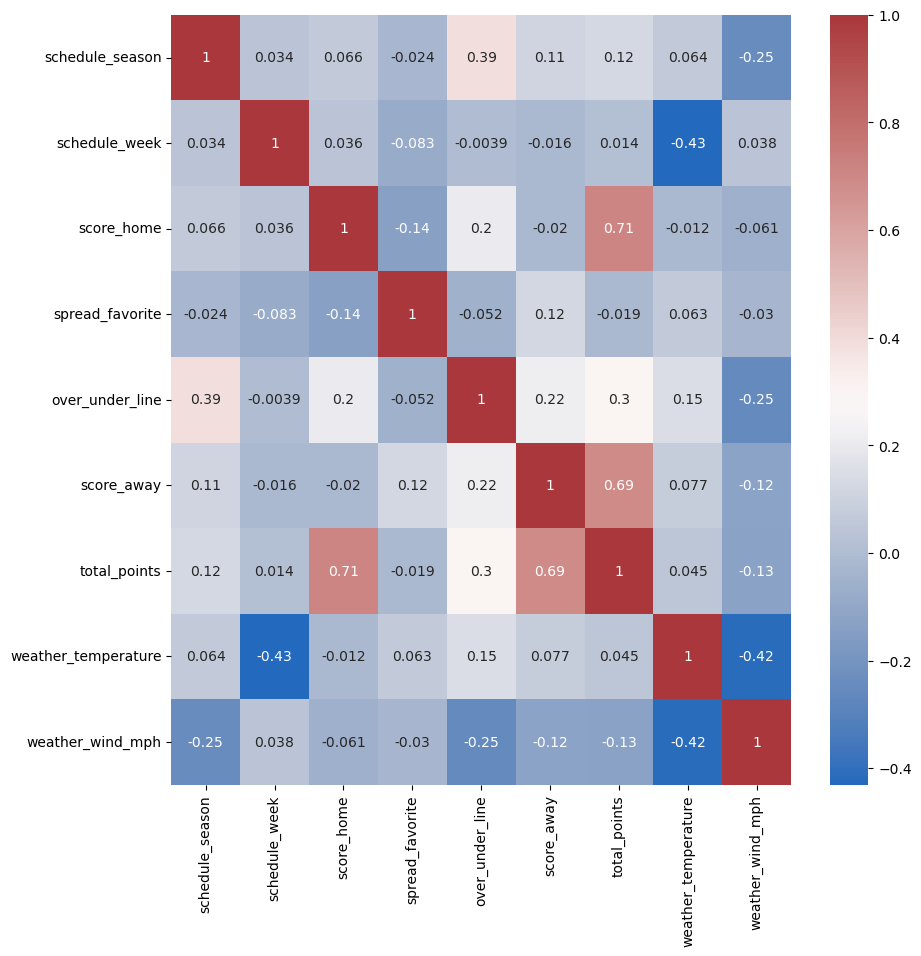

In [37]:
plt.figure(figsize=(10,10))
sns.heatmap(numerical.corr(), annot=True, cmap='vlag')
plt.show()

In [38]:
# Podemos obervar que nuestra variable de total points esta altamente correlacionada, por lo que no nos sirve para nuestro estudio, ya que no buscamos la prediccion de puntos totales para nuestro estudio
numerical=numerical.drop(['total_points'], axis=1)
numerical=numerical.drop(['score_home', 'score_away'], axis=1)

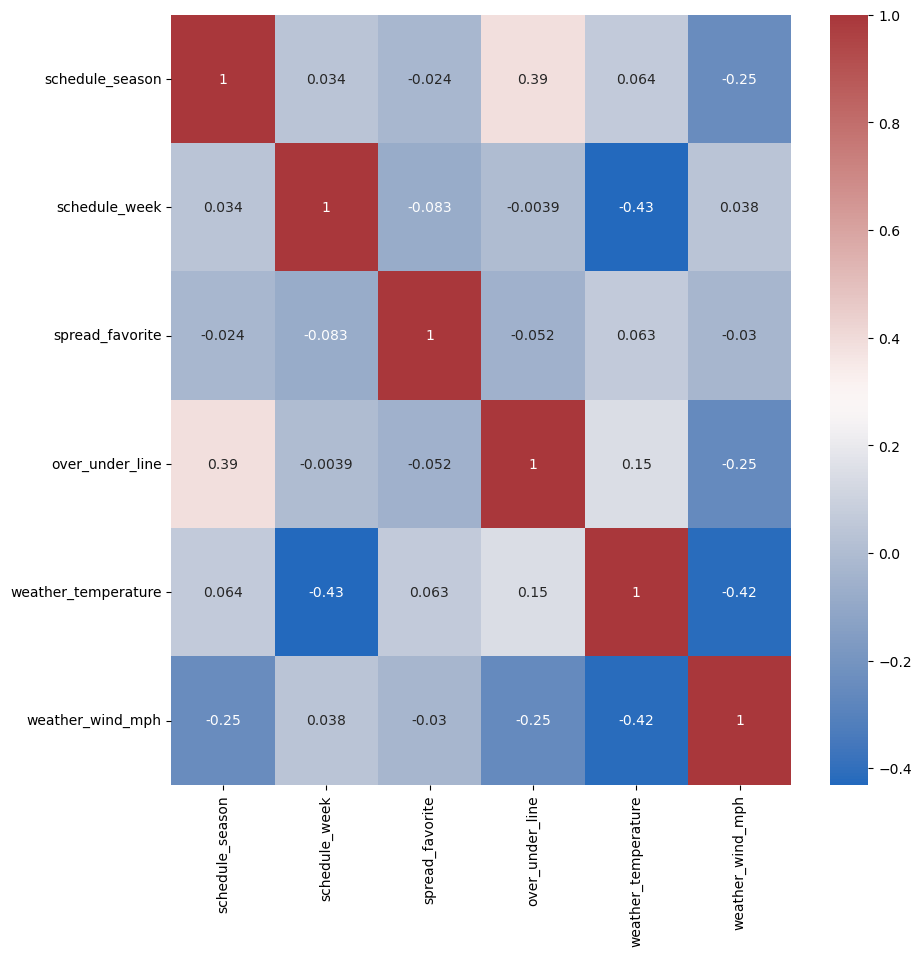

In [39]:
plt.figure(figsize=(10,10))
sns.heatmap(numerical.corr(), annot=True, cmap='vlag')
plt.show()

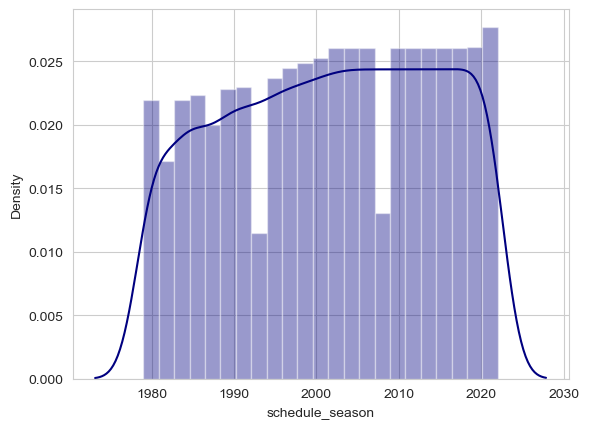

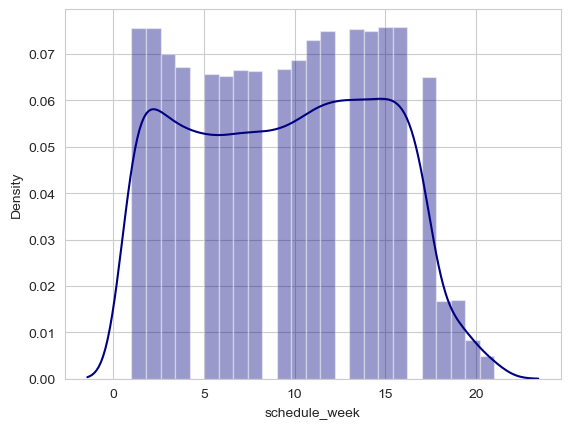

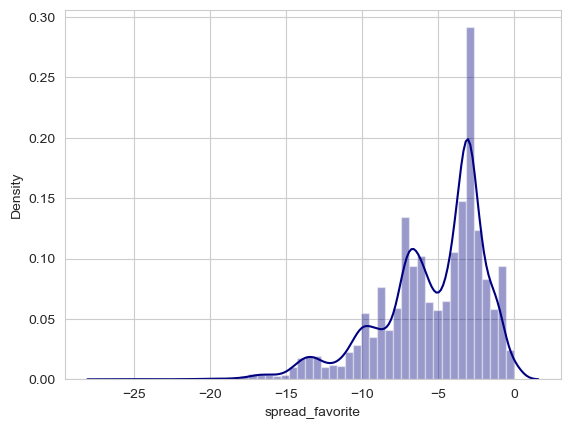

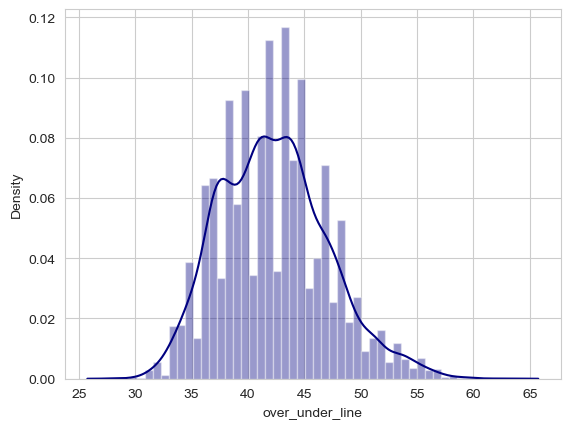

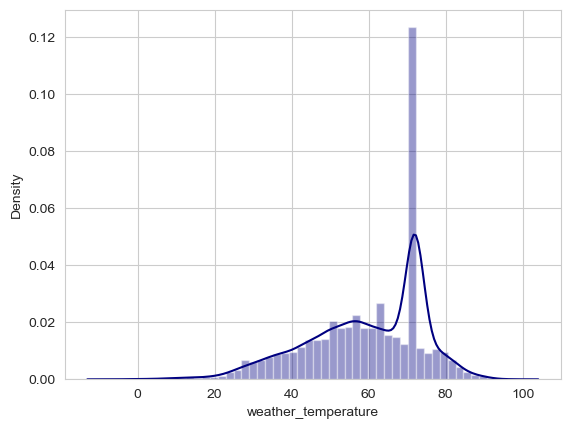

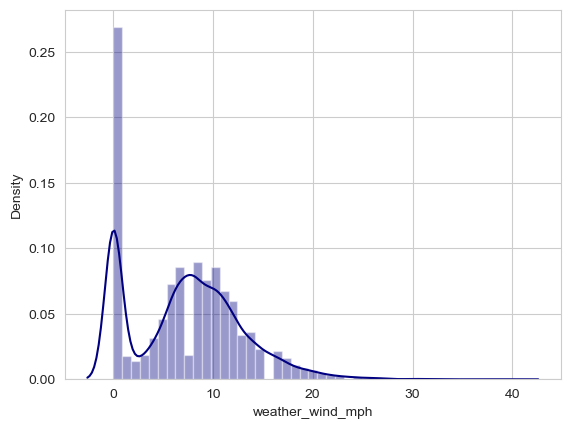

In [40]:
# Graficamos nuestras variables numericas
sns.set_style("whitegrid") #te modifica el cuadriculado)

for i in range(6):
    sns.distplot(numerical.iloc[:,i], color='navy')
    plt.show()

<font color='orange'> Trabajamos con nuestras categoricas </font>

In [41]:
categorical

,team_home,team_away,winner,divisional,team_home_conference,team_home_division,team_away_conference,team_away_division,stadium
0,Buccaneers,Lions,Buccaneers,TRUE,NFC,NFC Central,NFC,NFC Central,Houlihan's Stadium
1,Buccaneers,Lions,Lions,TRUE,NFC,NFC Central,NFC,NFC Central,Houlihan's Stadium
2,Buccaneers,Lions,Buccaneers,TRUE,NFC,NFC Central,NFC,NFC Central,Houlihan's Stadium
3,Buccaneers,Lions,Buccaneers,TRUE,NFC,NFC Central,NFC,NFC Central,Houlihan's Stadium
4,Buccaneers,Lions,Lions,TRUE,NFC,NFC Central,NFC,NFC Central,Houlihan's Stadium
...,...,...,...,...,...,...,...,...,...
10947,Panthers,Raiders,Raiders,FALSE,NFC,NFC West,AFC,AFC West,Bank of America Stadium
10948,Titans,Raiders,Titans,FALSE,AFC,AFC Central,AFC,AFC West,Nissan Stadium
10949,Chargers,Raiders,Raiders,TRUE,AFC,AFC West,AFC,AFC West,SoFi Stadium
10950,Chargers,Raiders,Chargers,TRUE,AFC,AFC West,AFC,AFC West,SoFi Stadium


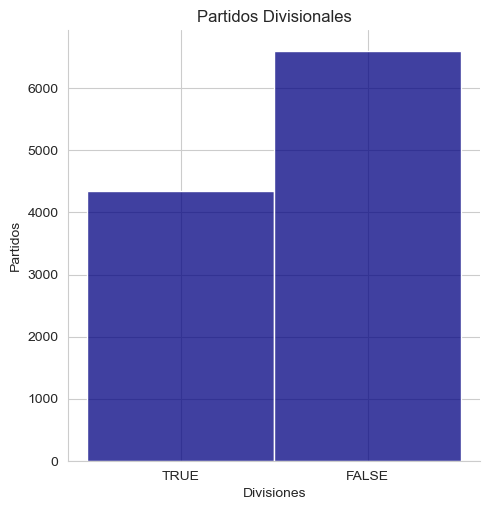

In [42]:
sns.displot(categorical['divisional'], color='navy', height=5, aspect=1).set(title='Partidos Divisionales', xlabel= 'Divisiones',ylabel="Partidos")

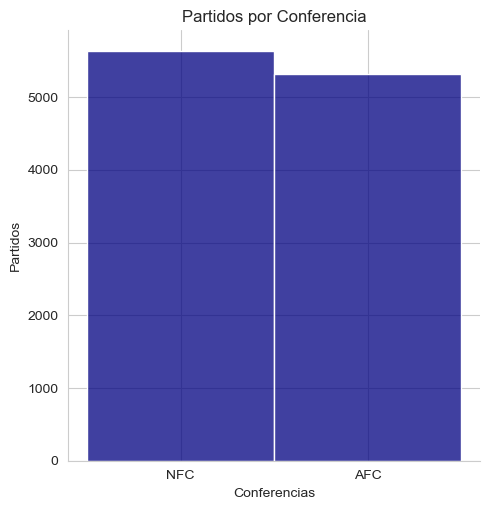

In [43]:

sns.displot(categorical['team_away_conference'],color='navy', height=5, aspect=1).set(title='Partidos por Conferencia', xlabel= 'Conferencias', ylabel='Partidos')

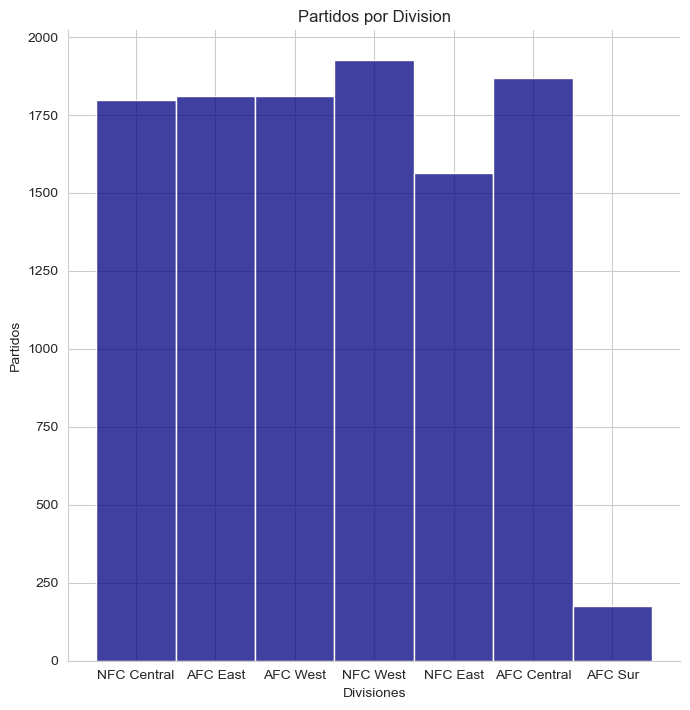

In [44]:
sns.displot(categorical['team_home_division'] ,color='navy', height=7, aspect=1).set(title='Partidos por Division', xlabel= 'Divisiones', ylabel="Partidos")

<font color='orange'> Aplicamos Label Encoding </font>

In [45]:
from sklearn import preprocessing
categorical=categorical.apply(preprocessing.LabelEncoder().fit_transform)
categorical

,team_home,team_away,winner,divisional,team_home_conference,team_home_division,team_away_conference,team_away_division,stadium
0,6,18,6,1,1,4,1,4,34
1,6,18,18,1,1,4,1,4,34
2,6,18,6,1,1,4,1,4,34
3,6,18,6,1,1,4,1,4,34
4,6,18,18,1,1,4,1,4,34
...,...,...,...,...,...,...,...,...,...
10947,21,23,23,0,1,6,0,3,9
10948,30,23,30,0,0,0,0,3,61
10949,8,23,23,1,0,3,0,3,77
10950,8,23,8,1,0,3,0,3,77


In [46]:
categorical.dtypes

team_home               int32
team_away               int32
winner                  int32
divisional              int32
team_home_conference    int32
team_home_division      int32
team_away_conference    int32
team_away_division      int32
stadium                 int32
dtype: object

In [47]:
data=np.concatenate((numerical,categorical), axis=1)
data=pd.DataFrame(data)
data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,1979.0,1.0,-3.0,30.0,79.000000,9.000000,6.0,18.0,6.0,1.0,1.0,4.0,1.0,4.0,34.0
1,1980.0,12.0,-3.0,39.0,69.000000,9.000000,6.0,18.0,18.0,1.0,1.0,4.0,1.0,4.0,34.0
2,1981.0,5.0,-1.0,36.0,76.000000,9.000000,6.0,18.0,6.0,1.0,1.0,4.0,1.0,4.0,34.0
3,1982.0,16.0,-3.5,36.0,73.000000,11.000000,6.0,18.0,6.0,1.0,1.0,4.0,1.0,4.0,34.0
4,1983.0,1.0,-3.0,38.0,82.000000,7.000000,6.0,18.0,18.0,1.0,1.0,4.0,1.0,4.0,34.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10947,2020.0,1.0,-3.0,48.0,58.510000,6.207447,21.0,23.0,23.0,0.0,1.0,6.0,0.0,3.0,9.0
10948,2022.0,3.0,-2.0,45.5,57.801282,6.615385,30.0,23.0,30.0,0.0,0.0,0.0,0.0,3.0,61.0
10949,2020.0,9.0,-1.0,52.5,72.000000,0.000000,8.0,23.0,23.0,1.0,0.0,3.0,0.0,3.0,77.0
10950,2021.0,4.0,-3.0,51.5,72.000000,0.000000,8.0,23.0,8.0,1.0,0.0,3.0,0.0,3.0,77.0


In [48]:
data=data.set_axis(['schedule_season','schedule_week','spread_favorite','over_under_line','weather_temperature','weather_wind_mph','team_home','team_away','winner','divisional','team_home_conference','team_home_division','team_away_conference','team_away_division', 'stadium'], axis=1)


In [49]:
corr_matrix=data.corr()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

Text(0.5, 1.0, 'Triangle Correlation Heatmap')

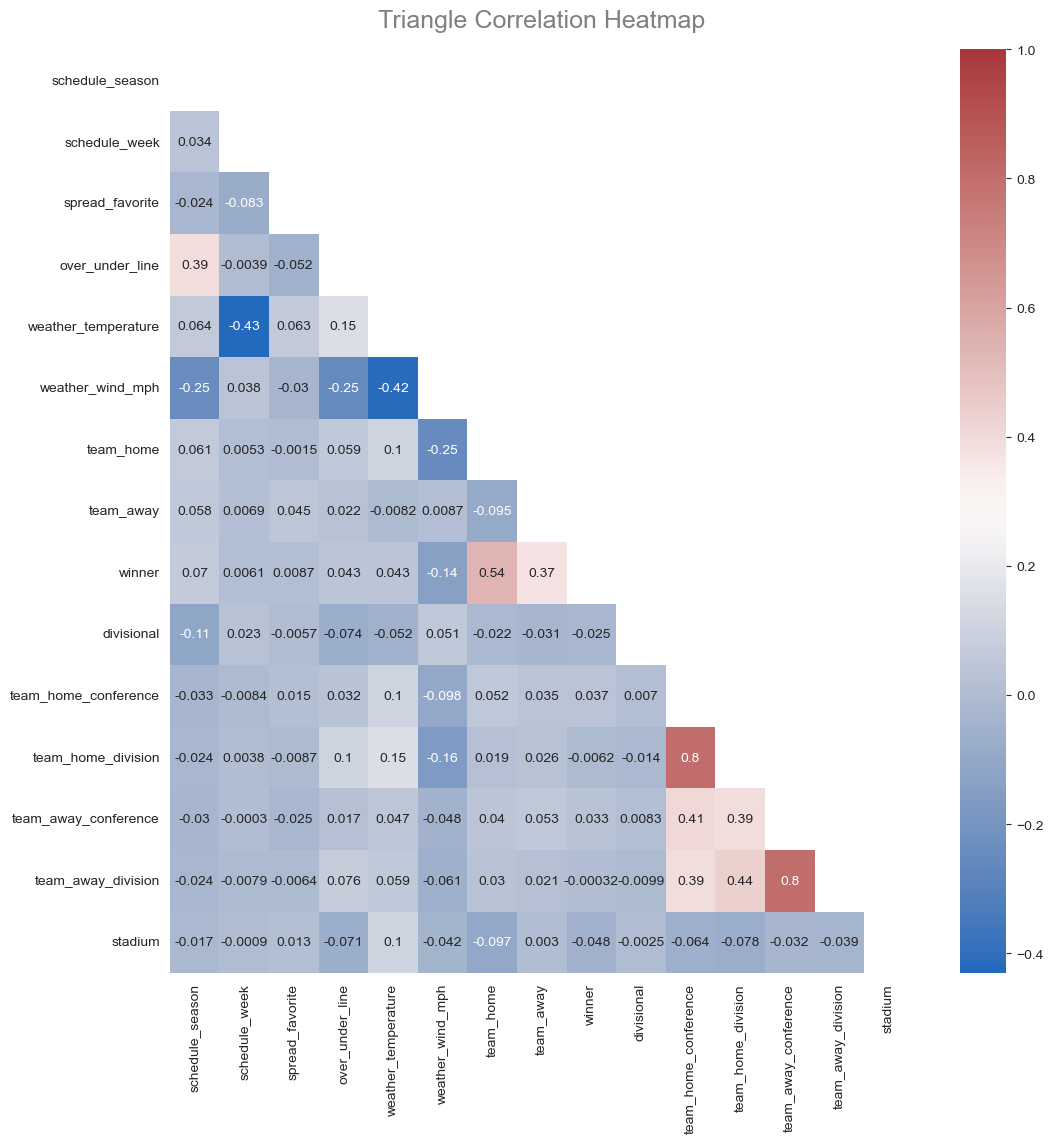

In [50]:
plt.figure(figsize=(12,12))
mascara=np.triu(np.ones_like(data.corr(), dtype=np.bool)) # aislar el triángulo superior de una matriz mientras convierte todos los valores en el triángulo inferior en 
heatmap = sns.heatmap(data.corr(), mask=mascara, vmax=1, annot=True, cmap='vlag') #podemos establecer el valor maximo y minimo
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16, color='grey')

In [51]:
# Vamos a eliminar de nuestra data el team_home_conference y el team_away_conference
data=data.drop(['team_home_conference','team_away_conference','weather_temperature'], axis=1)
# Y vamos a dar nombres a nuestras columnas


Text(0.5, 1.0, 'Triangle Correlation Heatmap')

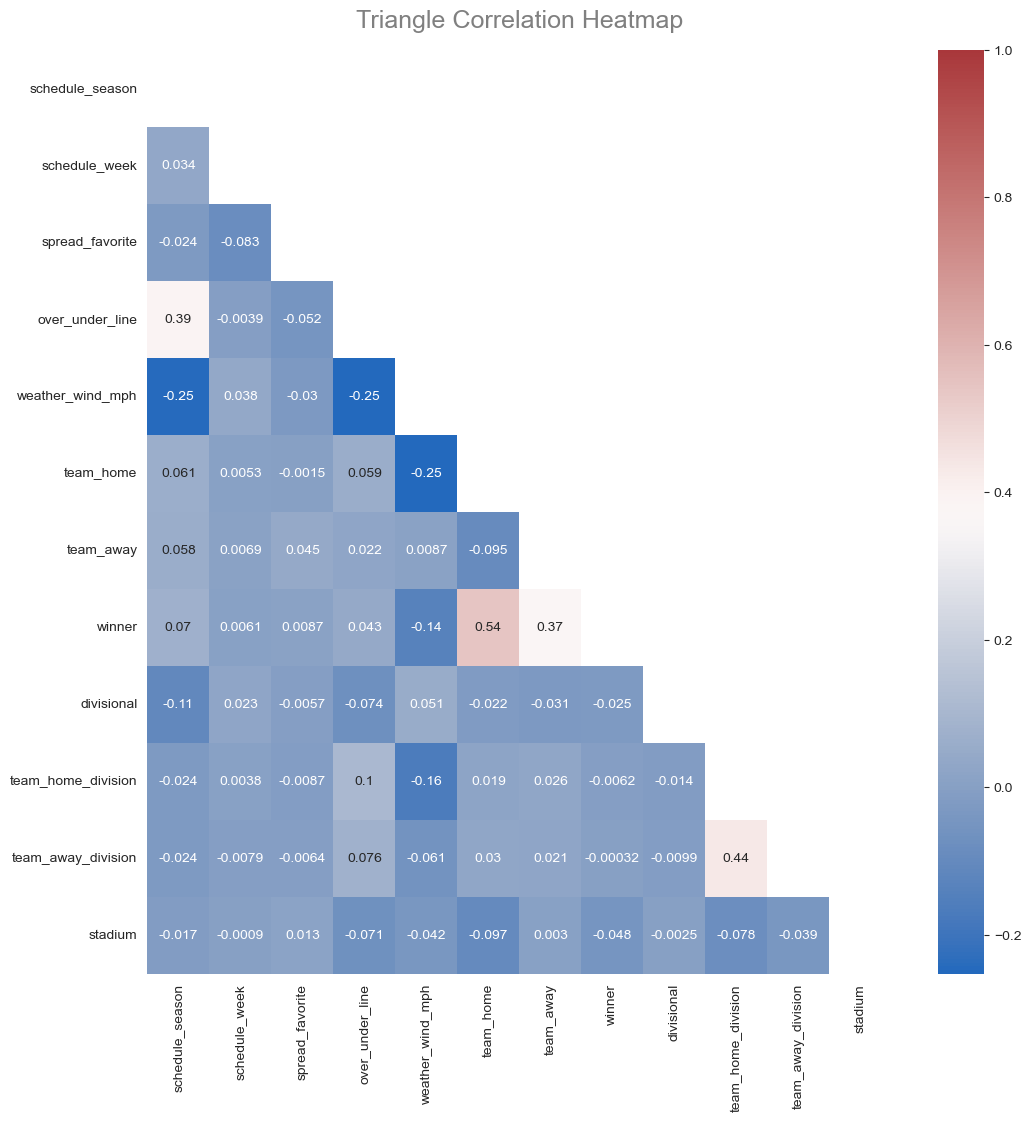

In [52]:
plt.figure(figsize=(12,12))
mascara=np.triu(np.ones_like(data.corr(), dtype=np.bool)) # aislar el triángulo superior de una matriz mientras convierte todos los valores en el triángulo inferior en 
heatmap = sns.heatmap(data.corr(), mask=mascara, vmax=1, annot=True, cmap='vlag') #podemos establecer el valor maximo y minimo
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16, color='grey')

In [53]:
data

,schedule_season,schedule_week,spread_favorite,over_under_line,weather_wind_mph,team_home,team_away,winner,divisional,team_home_division,team_away_division,stadium
0,1979.0,1.0,-3.0,30.0,9.000000,6.0,18.0,6.0,1.0,4.0,4.0,34.0
1,1980.0,12.0,-3.0,39.0,9.000000,6.0,18.0,18.0,1.0,4.0,4.0,34.0
2,1981.0,5.0,-1.0,36.0,9.000000,6.0,18.0,6.0,1.0,4.0,4.0,34.0
3,1982.0,16.0,-3.5,36.0,11.000000,6.0,18.0,6.0,1.0,4.0,4.0,34.0
4,1983.0,1.0,-3.0,38.0,7.000000,6.0,18.0,18.0,1.0,4.0,4.0,34.0
...,...,...,...,...,...,...,...,...,...,...,...,...
10947,2020.0,1.0,-3.0,48.0,6.207447,21.0,23.0,23.0,0.0,6.0,3.0,9.0
10948,2022.0,3.0,-2.0,45.5,6.615385,30.0,23.0,30.0,0.0,0.0,3.0,61.0
10949,2020.0,9.0,-1.0,52.5,0.000000,8.0,23.0,23.0,1.0,3.0,3.0,77.0
10950,2021.0,4.0,-3.0,51.5,0.000000,8.0,23.0,8.0,1.0,3.0,3.0,77.0


In [54]:
# Vamos a Estandarizar toda nuestra data
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
data_sta=scale.fit_transform(data)
data_standard=pd.DataFrame(data_sta) 


In [55]:
from sklearn.preprocessing import Normalizer
transformer=Normalizer().fit(data)
X_norm=transformer.transform(data)
data_norm=pd.DataFrame(X_norm) 

In [56]:
data1=data_standard.set_axis(['schedule_season',	'schedule_week',	'spread_favorite',	'over_under_line',	'weather_wind_mph',	'team_home',	'team_away',	'winner',	'divisional',	'team_home_division',	'team_away_division',	'stadium'], axis=1)
data2=data_norm.set_axis(['schedule_season',	'schedule_week',	'spread_favorite',	'over_under_line',	'weather_wind_mph',	'team_home',	'team_away',	'winner',	'divisional',	'team_home_division',	'team_away_division',	'stadium'], axis=1)

In [57]:
data2.to_csv('datafinalisima.csv')

<font color='orange'> Splitting data </font>

In [58]:
X=data2.drop(['winner'],axis=1) # Target
y=data2['winner']
X.shape, y.shape

((10952, 11), (10952,))

# <font color='orange'> Modelos </font>

# <font color='white'> Linear Regression </font>

In [59]:
X_train1,X_test1,y_train1,y_test1=train_test_split(X,y,test_size=0.2, random_state=40)

In [60]:
lm=linear_model.LinearRegression()
lm.fit(X_train1,y_train1)


LinearRegression()

In [61]:
# Probamos para mis datos de prueba
pred_ln=lm.predict(X_test1)
print('Testing R2 Score:', r2_score(y_test1,pred_ln))
print('Testing RMSE:', np.sqrt(mean_squared_error(y_test1,pred_ln)))
print('Testing MAE:', mean_absolute_error(y_test1, pred_ln))
print('Testing MAE:', mean_squared_error(y_test1, pred_ln))

Testing R2 Score: 0.5332335125614238
Testing RMSE: 0.003299111927593331
Testing MAE: 0.0026983850283134278
Testing MAE: 1.0884139510788584e-05


In [62]:
# Probamos para mis datos de entrenamiento
pred_ln_trn=lm.predict(X_train1)
print('Testing R2 Score:', r2_score(y_train1,pred_ln_trn))
print('Testing RMSE:', np.sqrt(mean_squared_error(y_train1,pred_ln_trn)))
print('Testing MAE:', mean_absolute_error(y_train1, pred_ln_trn))
print('Testing MAE:', mean_squared_error(y_train1, pred_ln_trn))

# El modelo es bajo tanto para prueba y entrenamiento, hay que buscar otro modelo

Testing R2 Score: 0.5290836261046832
Testing RMSE: 0.0032920768137844857
Testing MAE: 0.0027005841971532757
Testing MAE: 1.083776974785741e-05


# <font color='white'> Random Forest Regressor </font>

In [63]:
X_train2,X_test2,y_train2,y_test2=train_test_split(X,y,test_size=0.2, random_state=40)
model_rf = RandomForestRegressor (random_state=40)
accuracies = cross_val_score(model_rf, X_train2, y_train2)
model_rf.fit(X_train2,y_train2)

print("Train Score:", np.mean(accuracies))
print("Test Score:", model_rf.score(X_test2, y_test2))

Train Score: 0.705376902841271
Test Score: 0.7234636349086374


In [64]:
# Para nuestros datos de prueba
pred_rf = model_rf.predict(X_test2)
print('Testing R2 Score:', r2_score(y_test2,pred_rf))
print('Testing RMSE:', np.sqrt(mean_squared_error(y_test2,pred_rf)))
print('Testing MAE:', mean_absolute_error(y_test2, pred_rf))
print('Testing MAE:', mean_squared_error(y_test2, pred_rf))

Testing R2 Score: 0.7234636349086374
Testing RMSE: 0.002539354544408685
Testing MAE: 0.001881832785688624
Testing MAE: 6.448321502209041e-06


In [65]:
# Para nuestros datos de entrenamiento
pred_rf_trn = model_rf.predict(X_train2)
print('Testing R2 Score:', r2_score(y_train2,pred_rf_trn))
print('Testing RMSE:', np.sqrt(mean_squared_error(y_train2,pred_rf_trn)))
print('Testing MAE:', mean_absolute_error(y_train2, pred_rf_trn))
print('Testing MAE:', mean_squared_error(y_train2, pred_rf_trn))
# Los errores son menores en comparacion al conjunto de prueba y mi R2 caudrada es del 99%

Testing R2 Score: 0.9606963267547304
Testing RMSE: 0.0009510747125775121
Testing MAE: 0.0006991503986476544
Testing MAE: 9.045431089043972e-07


<function matplotlib.pyplot.show(close=None, block=None)>

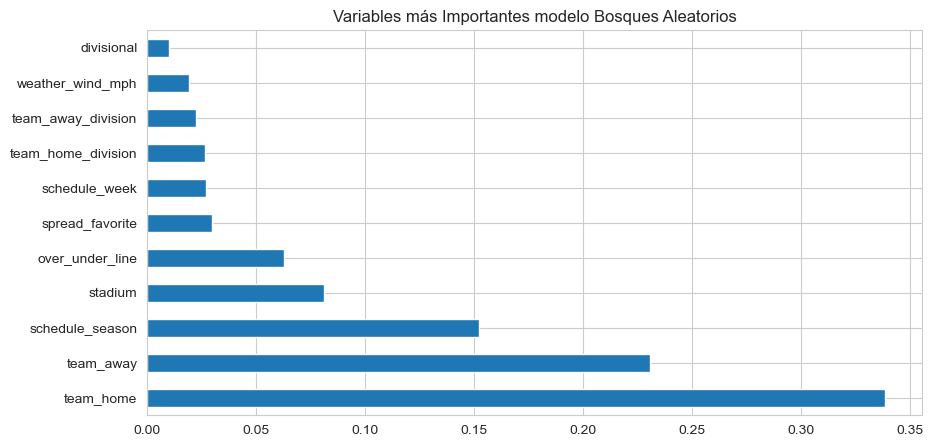

In [66]:
# Graficamos las variables de mayor importancia
plt.figure(figsize=(10,5))
feat_importance_rf = pd.Series(model_rf.feature_importances_, index=X.columns)
feat_importance_rf.nlargest(11).plot(kind='barh' )
plt.title('Variables más Importantes modelo Bosques Aleatorios')
plt.show

# <font color='white'> XGBoost Regressor </font>

In [67]:
X_train3,X_test3,y_train3,y_test3=train_test_split(X,y,test_size=0.2, random_state=40)
# Creamos el objeto de XGBoost
model_xgb = XGBRFRegressor(n_estimators =11,max_depth=6) # Entrenamiento , profundidad de 10
accuracies = cross_val_score(model_xgb, X_train3, y_train3)
model_xgb.fit(X_train3, y_train3)
print("Train Score:", np.mean(accuracies))
print("Test Score:", model_rf.score(X_test3, y_test3))


Train Score: 0.5561336460968404
Test Score: 0.7234636349086374


In [68]:
# Para nuestros datos de prueba
pred_xgb = model_xgb.predict(X_test3)
print('Testing RMSE:', np.sqrt(mean_squared_error(y_test3,pred_xgb)))
print('Testing MAE:', mean_absolute_error(y_test3, pred_xgb))
print('Testing MAE:', mean_squared_error(y_test3, pred_xgb))

Testing RMSE: 0.003177139321186634
Testing MAE: 0.002544500869786916
Testing MAE: 1.0094214266230266e-05


In [69]:
# Para nuestros datos de entrenamiento
pred_xgb_trn = model_xgb.predict(X_train3)
print('Testing RMSE:', np.sqrt(mean_squared_error(y_train3,pred_xgb_trn)))
print('Testing MAE:', mean_absolute_error(y_train3, pred_xgb_trn))
print('Testing MAE:', mean_squared_error(y_train3, pred_xgb_trn))

Testing RMSE: 0.00302426879203341
Testing MAE: 0.0024162919440755644
Testing MAE: 9.146201726467221e-06


<function matplotlib.pyplot.show(close=None, block=None)>

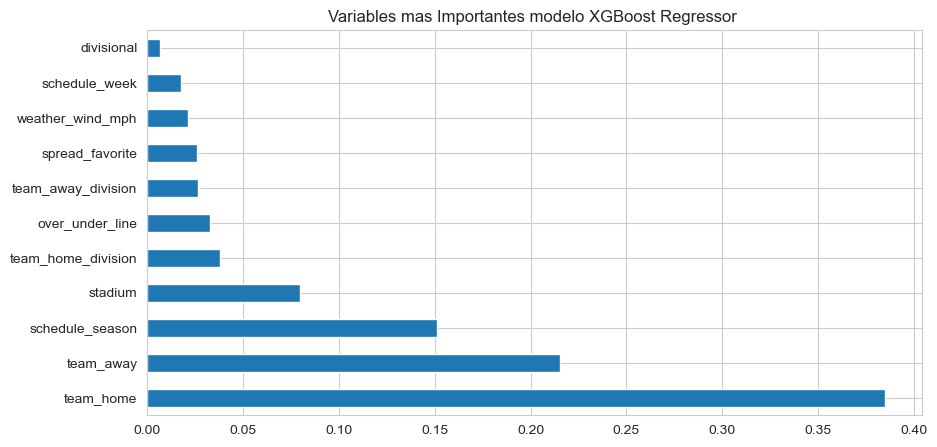

In [70]:
# Graficamos las variables de mayor importancia
plt.figure(figsize=(10,5))
feat_importance_rf = pd.Series(model_xgb.feature_importances_, index=X.columns)
feat_importance_rf.nlargest(11).plot(kind='barh' )
plt.title('Variables mas Importantes modelo XGBoost Regressor ')
plt.show

# <font color='white'> Vamos a hacer la comparacion de modelos </font>

In [71]:
modelos = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest', 'XGBoost'],
    "R2-Test":[r2_score(y_test1,pred_ln)*100, r2_score(y_test2,pred_rf)*100, r2_score(y_test3,pred_xgb)*100],
    "RMSE Test": [ np.sqrt(mean_squared_error(y_test1,pred_ln)),np.sqrt(mean_squared_error(y_test2,pred_rf)), np.sqrt(mean_squared_error(y_test3,pred_xgb))] ,
    "R2-Train":[ r2_score(y_train1,pred_ln_trn)*100, r2_score(y_train2,pred_rf_trn)*100, r2_score(y_train3,pred_xgb_trn)*100 ],
    "RMSE Train": [np.sqrt(mean_squared_error(y_train1,pred_ln_trn)),np.sqrt(mean_squared_error(y_train2,pred_rf_trn)), np.sqrt(mean_squared_error(y_train3,pred_xgb_trn)) ] 
     }) 

modelos


,Model,R2-Test,RMSE Test,R2-Train,RMSE Train
0,Linear Regression,53.323351,0.003299,52.908363,0.003292
1,Random Forest,72.346363,0.002539,96.069633,0.000951
2,XGBoost,56.710947,0.003177,60.258464,0.003024


In [72]:
# El mejor modelo es la Random Forest con un rendimiento mayor y un error menor en comparacion de los otros modelo
# Hice la prueba con data normalizada y no cambia mucho pero los resultados son menores a si no normalizo, por lo que me quedo con la data no normalizada 

In [73]:
# X.to_csv('datafinalnfl.csv')